<a href="https://colab.research.google.com/github/Mateus-dutravale/Bank-Marketing-Analysis/blob/main/P3_IA_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" Equipe:
- André Luis Aguiar do Nascimento,
- Bárbara Ellen Torres Cunha,
- João Guilherme Miranda Lago,
- Mateus Dutra Vale,
- Milena Freire Britto Neves """

' Equipe:\n- André Luis Aguiar do Nascimento,\n- Bárbara Ellen Torres Cunha,\n- João Guilherme Miranda Lago,\n- Mateus Dutra Vale,\n- Milena Freire Britto Neves '

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Buscar o dataset diretamente da UCI
bank_marketing = fetch_ucirepo(id=222)

# features e o target
X = bank_marketing.data.features
y = bank_marketing.data.targets

df = pd.concat([bank_marketing.data.features, bank_marketing.data.targets], axis=1)

copy_df = df.copy()
# Visualizar as primeiras linhas
print("Features:")
print(X.head())
print("\nTarget:")
print(y.head())

Features:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  

Target:
    y
0  no
1  no
2  no
3  no
4  no


In [ ]:
# Informações sobre as colunas do dataset
print("\nInformações sobre as variáveis:")
print(bank_marketing.variables)



Informações sobre as variáveis:
           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical  

0    no
1    no
2    no
3    no
4    no
Name: Target, dtype: object


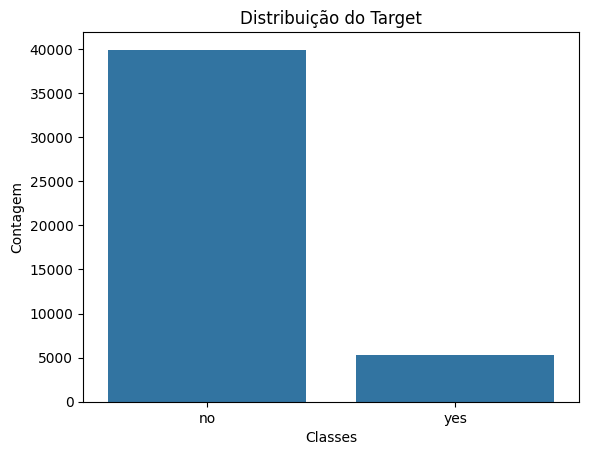

In [ ]:
# Garantir que o target está em formato compatível com o Seaborn
if not isinstance(y, pd.Series):
    y = y.iloc[:,0]
    y = pd.Series(y, name="Target")  # Nomeie a coluna como "Target"

# Visualizar as primeiras linhas do target
print(y.head())

# Plotar a distribuição do target
sns.countplot(x=y)
plt.title("Distribuição do Target")
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.show()

In [ ]:
X.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
X.shape

(45211, 16)

In [ ]:
X.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other


In [ ]:
X.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
6770,51,technician,single,secondary,no,511,yes,yes,NaN,28,may,67,2,-1,0,NaN
33914,37,technician,married,secondary,no,1458,no,no,cellular,30,apr,281,1,-1,0,NaN
3396,47,blue-collar,married,secondary,no,3008,yes,yes,NaN,15,may,236,3,-1,0,NaN
4283,31,blue-collar,single,tertiary,no,462,yes,yes,NaN,19,may,147,1,-1,0,NaN
13122,42,unemployed,married,secondary,no,-283,no,yes,cellular,8,jul,96,2,-1,0,NaN


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [ ]:
X.duplicated().sum()

0

In [ ]:
X.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [ ]:
X.isna().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [ ]:
X.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99,.999])

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
80%,51.000000,1859.000000,24.000000,368.000000,4.000000,-1.000000,0.000000
85%,53.000000,2539.000000,27.000000,437.000000,4.000000,102.000000,1.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000


In [ ]:
y.value_counts()

,count
Target,
no,39922
yes,5289


In [ ]:
# copia dos dados para analise posterior
X = X.copy()

In [ ]:
# obter os nomes de todas as colunas categóricas
categorical_columns = df.select_dtypes(include='object').columns

# converter todas as colunas categóricas para o tipo de dados 'category'
df[categorical_columns] = df[categorical_columns].astype('category')

# verificar os tipos de dados de todas as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          45211 non-null  int64   
 1   job          44923 non-null  category
 2   marital      45211 non-null  category
 3   education    43354 non-null  category
 4   default      45211 non-null  category
 5   balance      45211 non-null  int64   
 6   housing      45211 non-null  category
 7   loan         45211 non-null  category
 8   contact      32191 non-null  category
 9   day_of_week  45211 non-null  int64   
 10  month        45211 non-null  category
 11  duration     45211 non-null  int64   
 12  campaign     45211 non-null  int64   
 13  pdays        45211 non-null  int64   
 14  previous     45211 non-null  int64   
 15  poutcome     8252 non-null   category
 16  y            45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [ ]:
df.shape

(45211, 17)

In [ ]:
fig = px.histogram(df, x='y', color='y')
fig.update_layout(xaxis_title='Assinatura de depósito a prazo',yaxis_title='Contagem total de clientes')
fig.show()

In [ ]:
# verificando a contagem total de clientes bancários de acordo com as categorias de trabalho usando análise univariada

fig = px.histogram(df, x='job', color='job')
fig.update_layout(xaxis_title='Categorias de trabalho dos clientes do banco',yaxis_title='Contagem total de clientes')
fig.show()

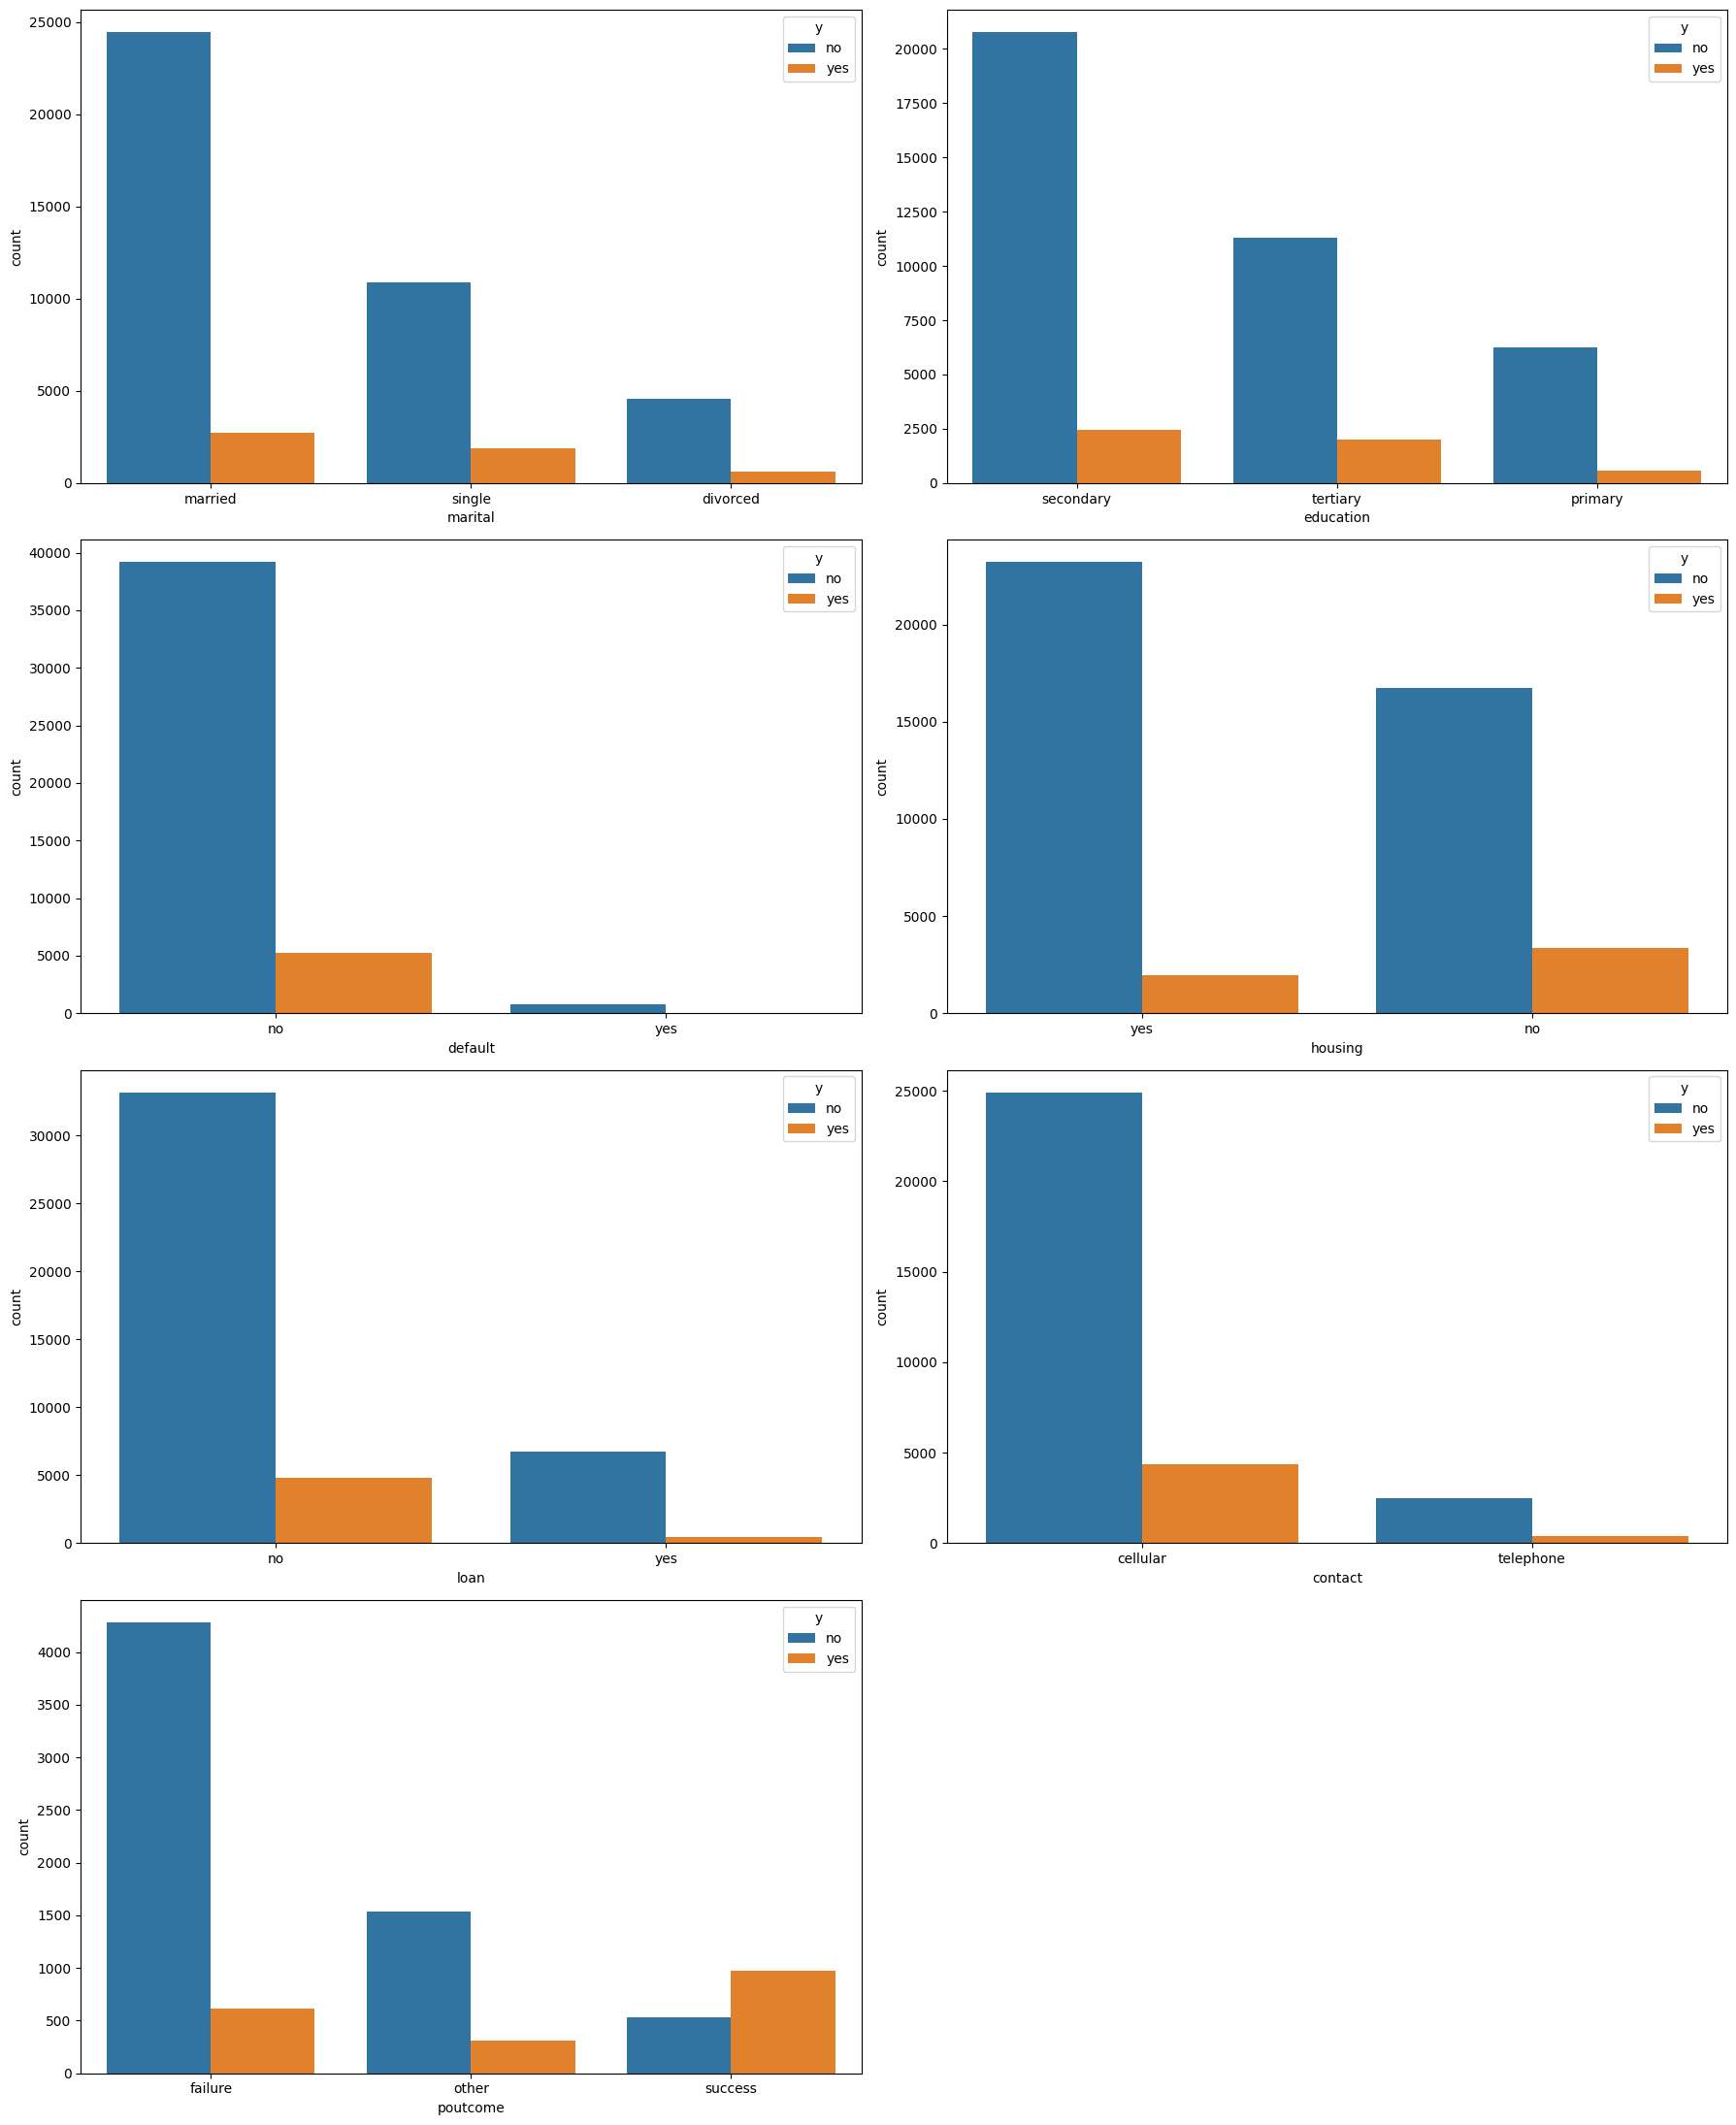

In [ ]:
# análise bivariada das variáveis categóricas restantes e da coluna de destino y(depósito a prazo)
categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

plt.figure(figsize=(18,22))
n = 1
for column in categorical:
  ax = plt.subplot(4,2,n)
  sns.countplot(x = column, hue='y', data=df, order=df[column].value_counts().index)
  plt.xlabel(column)
  plt.tight_layout()
  n += 1
plt.show()

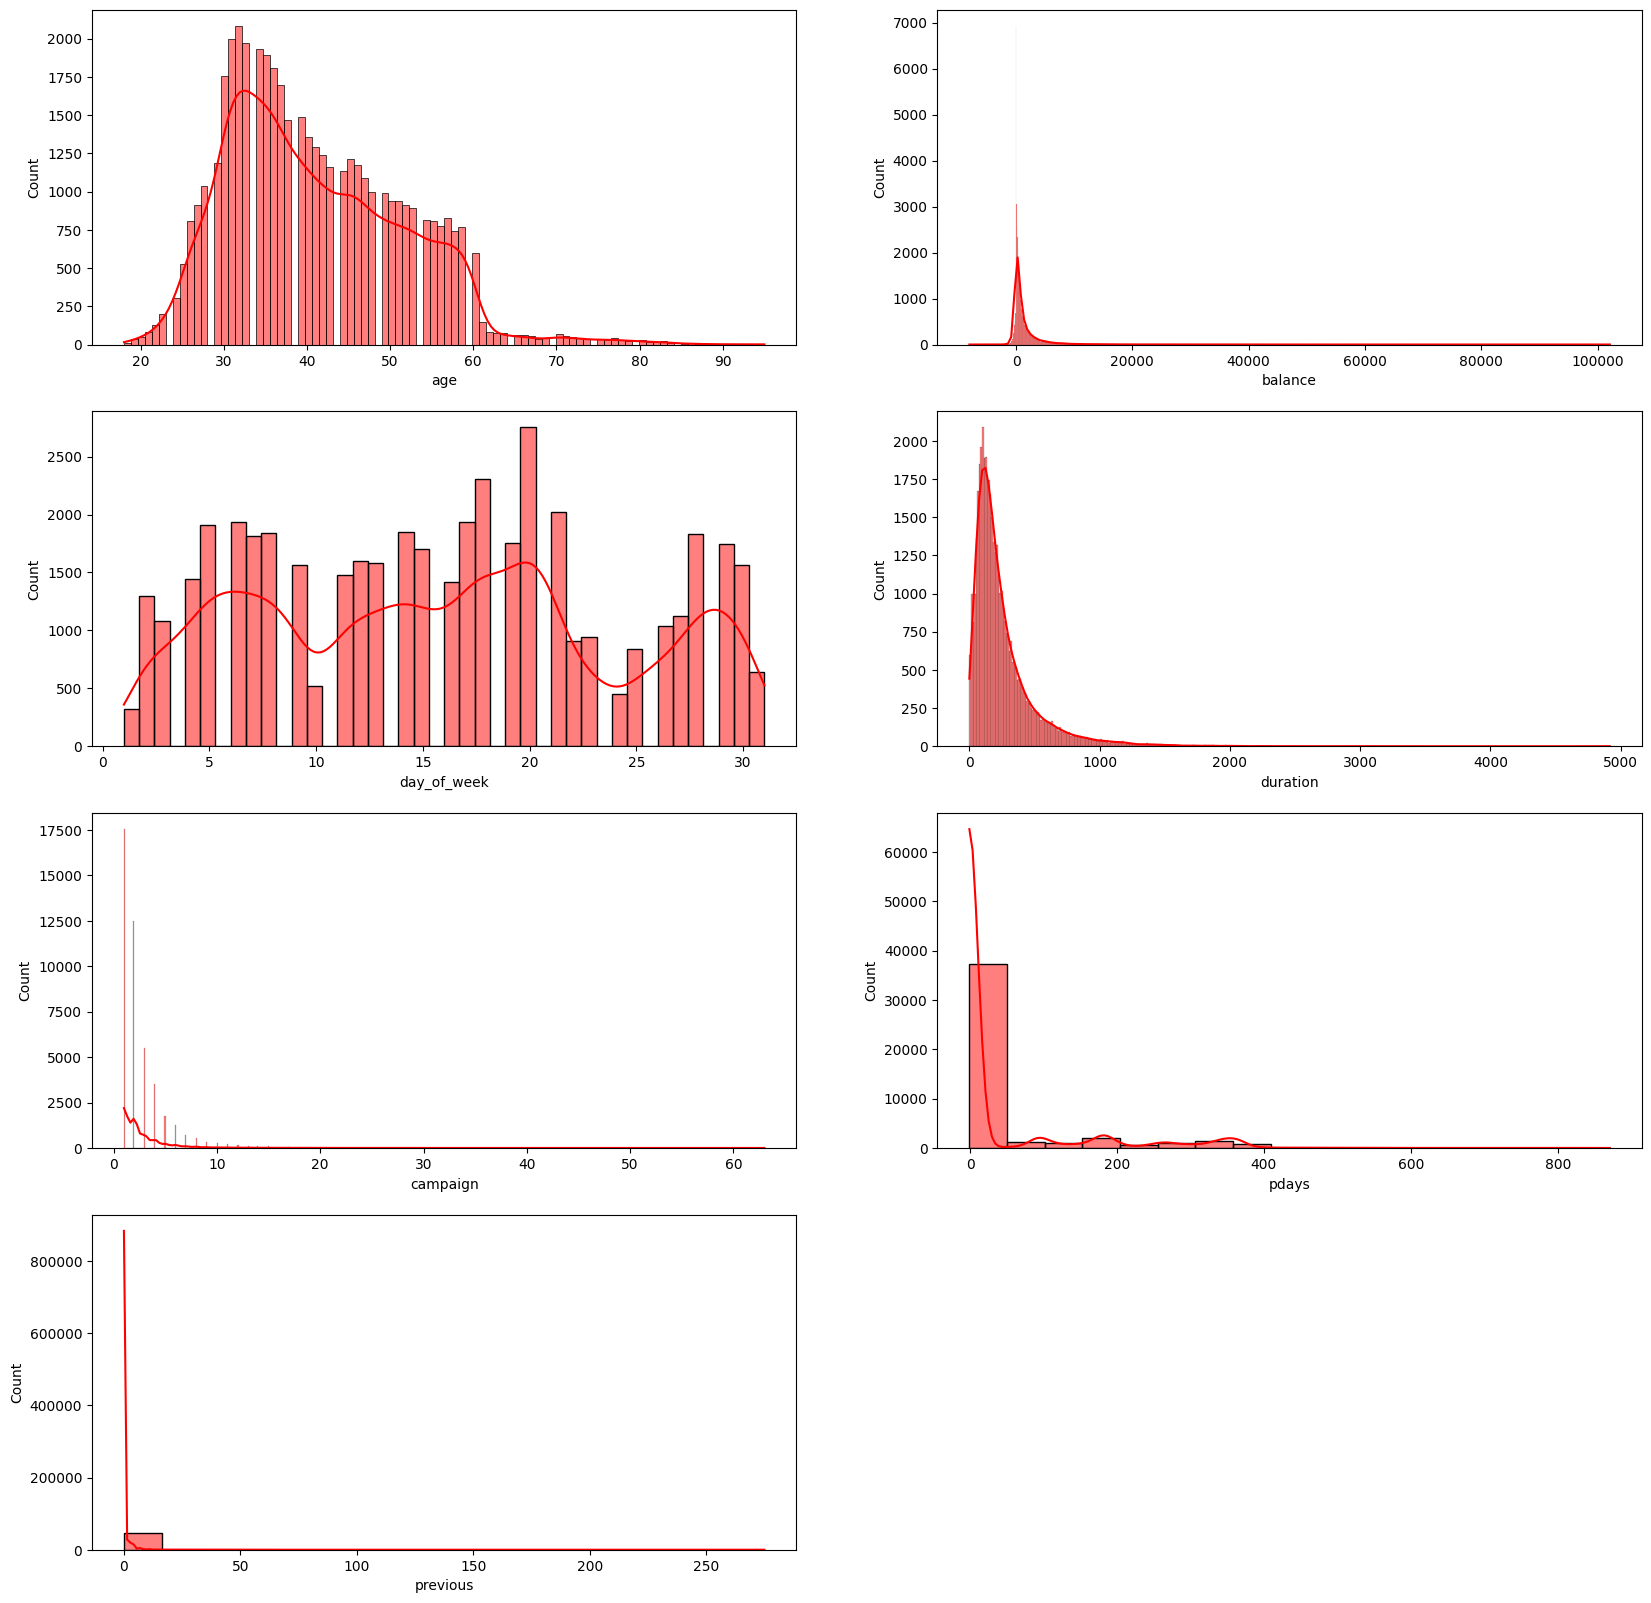

In [ ]:
# Verificando a distribuição de todas as variavei numericas
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20,20))

n=1
for col in numerical_columns:
  ax = plt.subplot(4,2,n)
  sns.histplot(df[col], kde=True, color ='red')
  n += 1
plt.show()

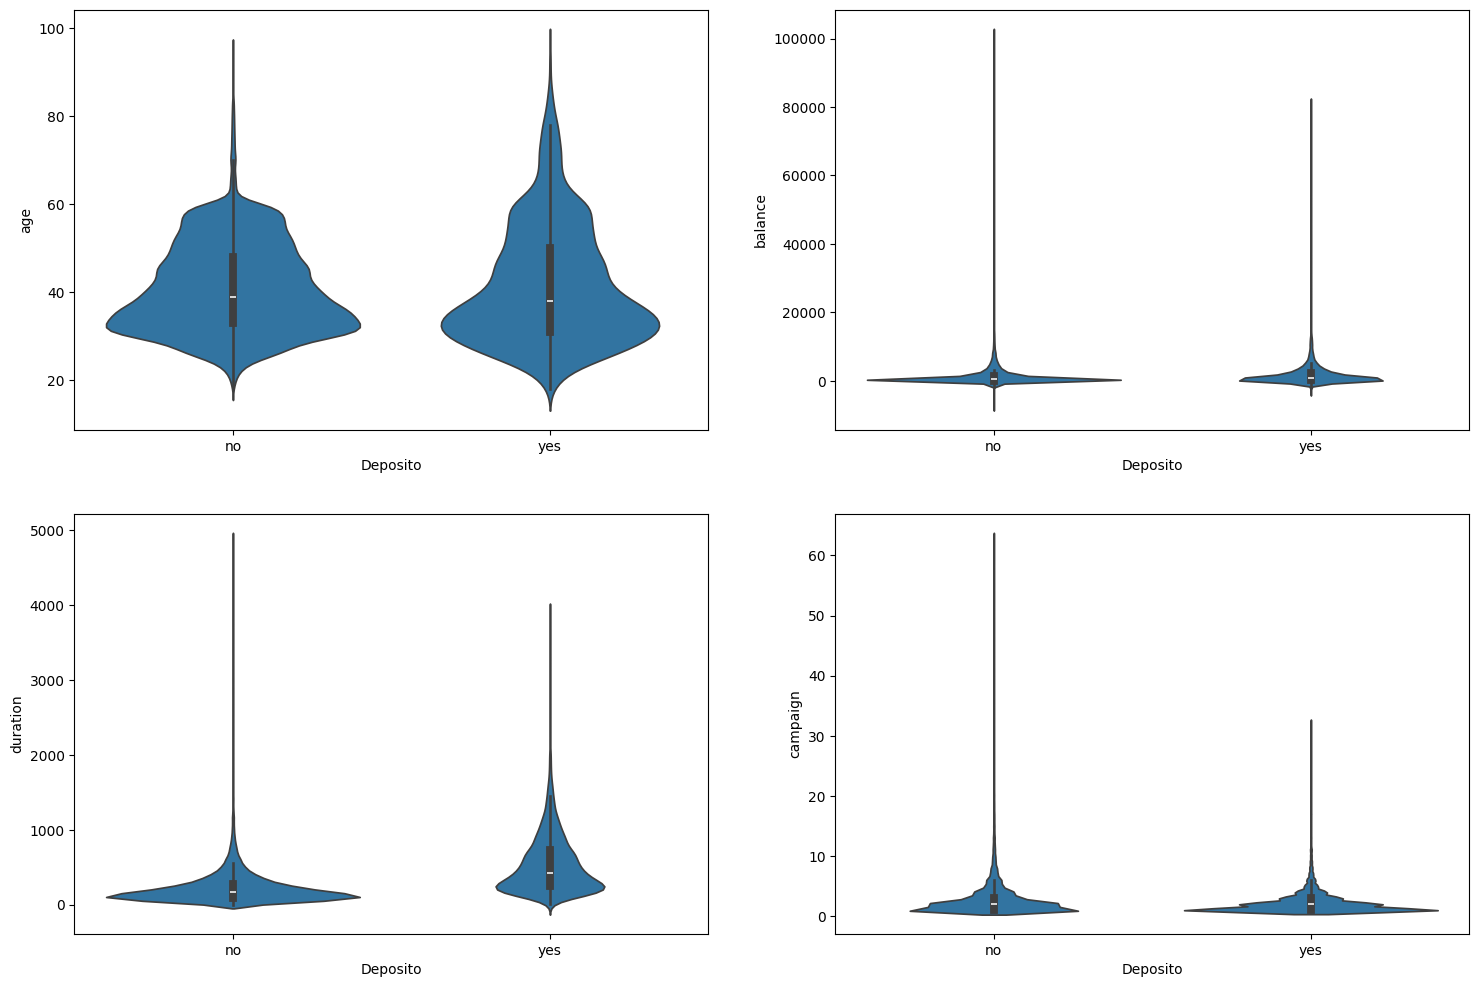

In [ ]:
# Visualização da distribuição de clientes que assinaram ou não um depósito a prazo usando um gráfico de violino com colunas numéricas

columns = ['age','balance','duration','campaign']

plt.figure(figsize=(18,12))
n=1
for col in columns:
  ax = plt.subplot(2,2,n)
  sns.violinplot(x='y', y=col ,data=df)
  plt.xlabel('Deposito')
  n += 1
plt.show()

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


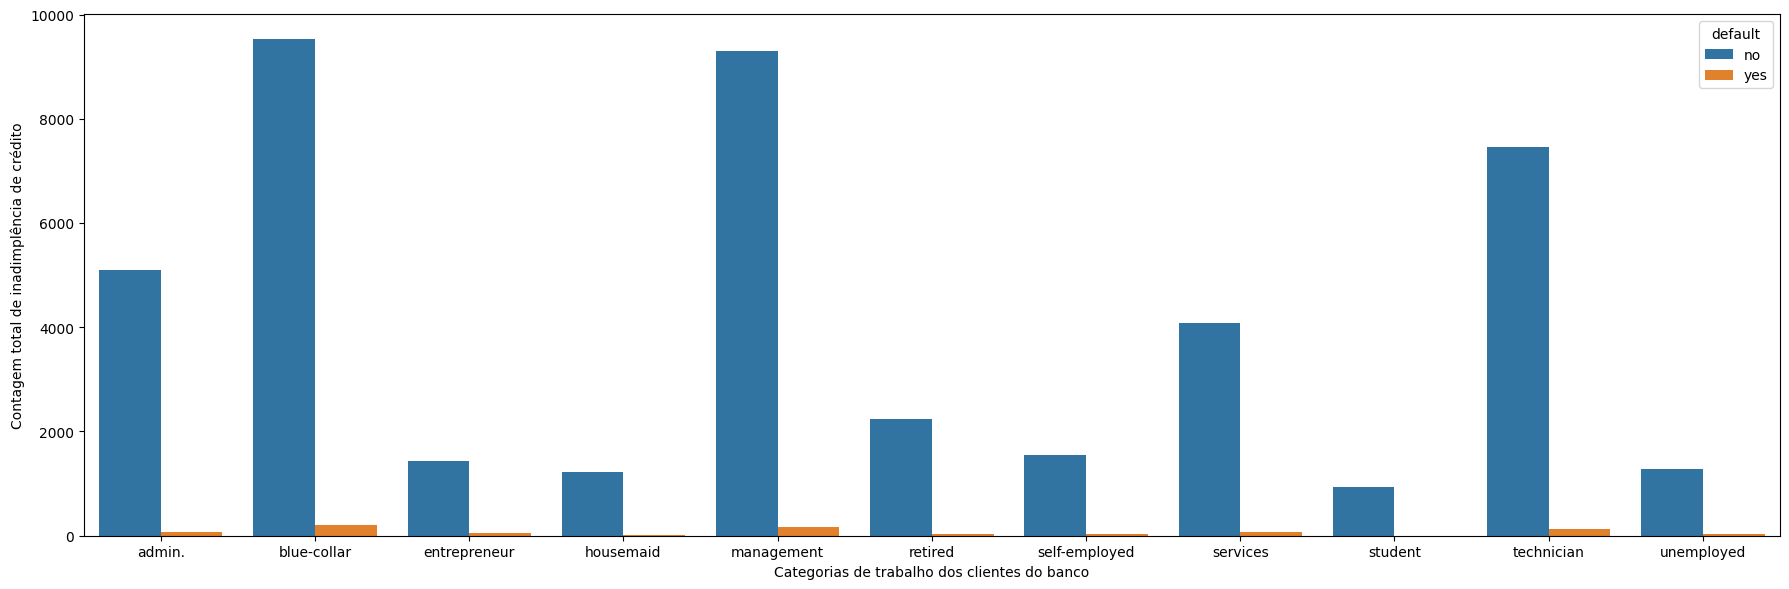

In [ ]:
plt.figure(figsize=(18,6))

sns.countplot(x='job', hue='default', data=df)
plt.xlabel('Categorias de trabalho dos clientes do banco', color='black')
plt.ylabel('Contagem total de inadimplência de crédito', color='black')

plt.tight_layout()
plt.show()

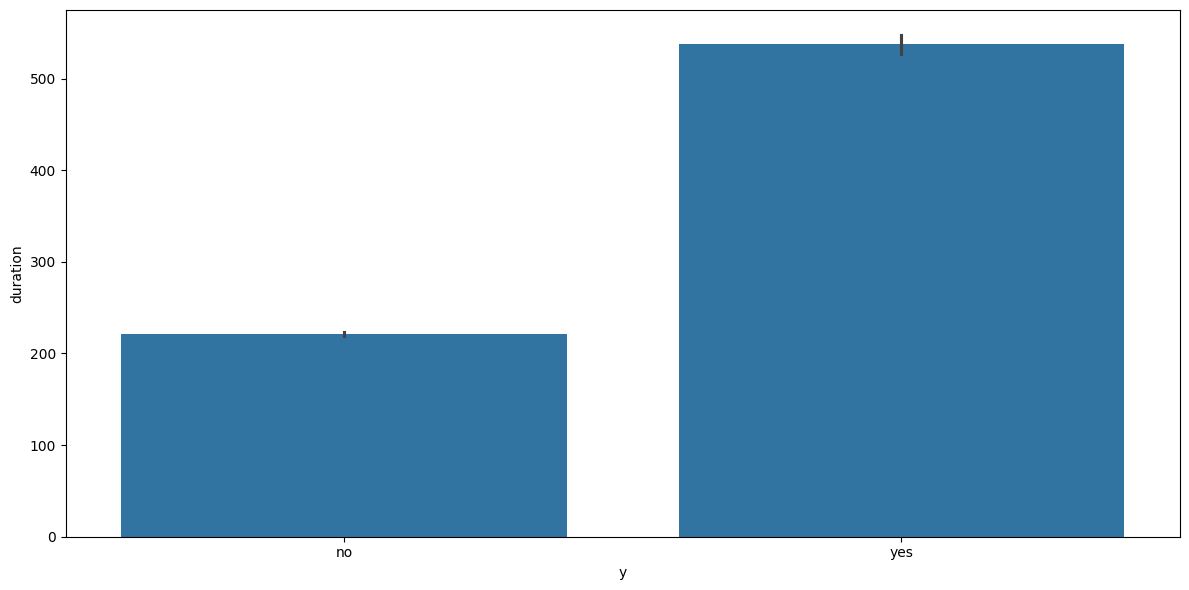

In [ ]:
# verificando a duração media dos clientes com base no deposito a prazo

plt.figure(figsize=(12,6))

sns.barplot(y='duration',x='y',data=df)
plt.tight_layout()
plt.show()

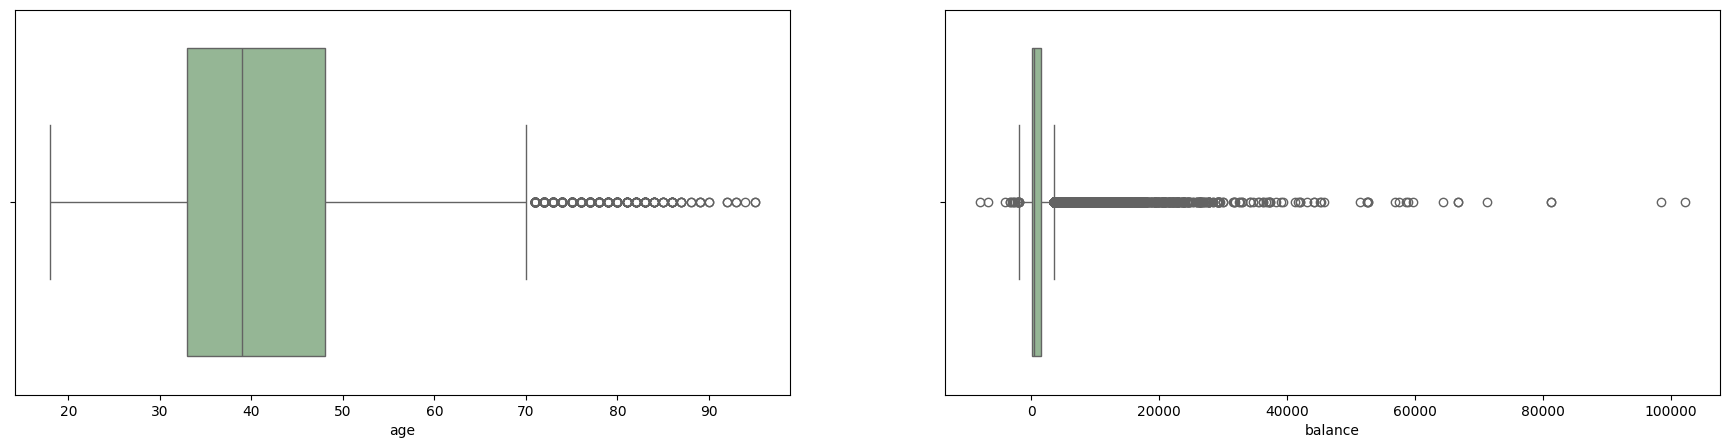

In [ ]:
# verificando os outliers

columns = ['age','balance']

plt.figure(figsize=(22,5))

n = 1
for col in columns:
    ax = plt.subplot(1,2,n)
    sns.boxplot(x=df[col], color='#8FBC8F')
    plt.xlabel(col)
    n += 1
plt.show()

In [ ]:
# Conversão da coluna de trabalho em uma nova coluna categórica por meio da atribuição de categorias

def job_category(job):
  cat_1 = ['retired','student']
  cat_2 = ['blue-collar','management','technician','admin.','services']
  cat_3 = ['unemployed','housemaid','unknown']
  cat_4 = ['self-employed','entrepreneur']

  if job in cat_1 :
      return 'cat1'
  if job in cat_2 :
      return 'cat2'
  if job in cat_3 :
      return 'cat3'
  if job in cat_4 :
      return 'cat4'
  return job

In [ ]:
# aplicar a função job_category para adicionar uma nova coluna no conjunto de dados
df['job_categories']=df['job'].apply(job_category)

In [ ]:
# conversão da coluna de idade em uma nova coluna categórica por meio da atribuição de categorias

def age_category(age):
  if age < 30:
     return 'struggling'
  elif age < 50:
     return 'stable'
  elif age < 60:
     return 'about to retire'
  elif age < 75:
     return 'old age'
  else:
     return 'counting a last breathe'

In [ ]:
# aplicar a função age_category para adicionar uma nova coluna no conjunto de dados

df['age_categories']=df['age'].apply(age_category)

In [ ]:
# converter esses recursos em recursos numéricos de classe binária

df["default"]=df["default"].apply(lambda x : 1 if x=='yes' else 0)
df["loan"]=df["loan"].apply(lambda x : 1 if x=='yes' else 0)
df["housing"]=df["housing"].apply(lambda x : 1 if x=='yes' else 0)
df["y"]=df["y"].apply(lambda x : 1 if x=='yes' else 0)

In [ ]:
# retirando colunas

df.drop(columns=['age','job','pdays','duration','contact'], axis=1, inplace=True)

In [ ]:
# PRÉ PROCESSAMENTO


In [ ]:
# criando variaveis ficticias para as variaveis categoricas

marital = pd.get_dummies(df['marital'],prefix='marital')
# contact = pd.get_dummies(df['contact'], prefix='contact')
poutcome = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
month = pd.get_dummies(df['month'], prefix = 'month')
age_cat = pd.get_dummies(df['education'],prefix = 'education')
job = pd.get_dummies(df['job_categories'],prefix = 'job_categories')
education = pd.get_dummies(df['age_categories'],prefix = 'age_categories')

In [ ]:
df = pd.concat([df,marital,poutcome,month,education,job,age_cat],axis=1)

In [ ]:
# dropando a coluna original
original_categorical_columns = ['marital', 'contact', 'poutcome', 'month', 'education', 'job_categories', 'age_categories']

# Removendo as colunas originais se elas ainda existirem
for col in original_categorical_columns:
    if col in df.columns:
        df.drop(columns=[col], axis=1, inplace=True)

In [ ]:
# dropando os resultados das colunas
columns_to_drop = ['marital_divorced', 'poutcome_other', 'month_dec', 'job_categories_cat3', 'age_categories_counting a last breathe']
# filtrando colunas que não existem no dataframe
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df.drop(columns=existing_columns_to_drop, axis=1, inplace=True)

# if 'contact_unknown' in df.columns:
#     df.drop(columns=['contact_unknown'], axis=1, inplace=True)
if 'education_unknown' in df.columns:
    df.drop(columns=['education_unknown'], axis=1, inplace=True)

In [ ]:
df.sample()

,default,balance,housing,loan,day_of_week,campaign,previous,y,marital_married,marital_single,...,age_categories_about to retire,age_categories_old age,age_categories_stable,age_categories_struggling,job_categories_cat1,job_categories_cat2,job_categories_cat4,education_primary,education_secondary,education_tertiary
30202,0,741,0,0,5,1,1,0,True,False,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
df.shape

(45211, 33)

In [ ]:
x=df.drop(columns=['y'],axis=1)
y=(df['y'])

# variaveis copias da original
x_df = copy_df.drop(columns=['y'],axis=1)
y_df = copy_df['y']

In [ ]:
x.head()

,default,balance,housing,loan,day_of_week,campaign,previous,marital_married,marital_single,poutcome_failure,...,age_categories_about to retire,age_categories_old age,age_categories_stable,age_categories_struggling,job_categories_cat1,job_categories_cat2,job_categories_cat4,education_primary,education_secondary,education_tertiary
0,0,2143,1,0,5,1,0,True,False,False,...,True,False,False,False,False,True,False,False,False,True
1,0,29,1,0,5,1,0,False,True,False,...,False,False,True,False,False,True,False,False,True,False
2,0,2,1,1,5,1,0,True,False,False,...,False,False,True,False,False,False,True,False,True,False
3,0,1506,1,0,5,1,0,True,False,False,...,False,False,True,False,False,True,False,False,False,False
4,0,1,0,0,5,1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(x.shape)
print(y.shape)

(45211, 32)
(45211,)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Crie um objeto LabelEncoder
encoder = LabelEncoder()

# Obtem uma lista de colunas categóricas em x_df
categorical_cols = x_df.select_dtypes(include=['object', 'category']).columns

# Codifica os atributos categóricos em x_df
for col in categorical_cols:
    x_df[col] = encoder.fit_transform(x_df[col])

# Garanta que x e y tenham o mesmo número de amostras antes da reamostragem
x_original_shape = x.shape[0]  # Obtenha o número original de amostras em x
y = y[:x_original_shape]       # Selecione apenas os valores-alvo correspondentes para x

# Agora realize a reamostragem com SMOTE
sampler = SMOTE()
X_adp, y_adp = sampler.fit_resample(x, y)

X_origin, y_origin = sampler.fit_resample(x_df, y_df)

In [ ]:
# implementação de modelo e ajuste de hyperparametros

In [ ]:
# Validação cruzada

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# função para preparar os dados utilizando scalling e retornando x e y
def prepare_data(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Função para validação cruzada
def perform_cross_validation(X, y, model, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    print(f"\nResultados da Validação Cruzada ({n_folds} folds):")
    print(f"Acurácia média: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return cv_scores

# Função para treinar e avaliar o modelo inicial
def train_evaluate_initial_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Avaliar o modelo
    print("\nResultados do Modelo:")
    print("\nAcurácia:", accuracy_score(y_test, y_pred))
    print("\nRelatorio de Classificação:")
    print(classification_report(y_test, y_pred))

    return model

# Preparar os dados do modelo original
X_scaled_o, y_o = prepare_data(x_df, y_df)

X_train_o,X_test_o,y_train_o,y_test_o = train_test_split(x_df,y_df,test_size=0.2,random_state = 0)

# Realizar validação cruzada do modelo original
model1 = RandomForestClassifier(random_state=42)
cv_scores1 = perform_cross_validation(X_scaled_o, y_o, model1)

# Treinar e avaliar o modelo inicial original
print('')
print('MODELO ORIGINAL')
initial_model_o = train_evaluate_initial_model(X_train_o,X_test_o,y_train_o,y_test_o)


# Preparar os dados do modelo melhorado
X_scaled, y = prepare_data(X_adp, y_adp)

X_train,X_test,y_train,y_test = train_test_split(X_adp,y_adp,test_size=0.2,random_state = 0)

# Realizar validação cruzada do modelo melhorado
model = RandomForestClassifier(random_state=42)
cv_scores = perform_cross_validation(X_scaled, y, model)

# Treinar e avaliar o modelo inicial melhorado
print('')
print('MODELO MELHORADO')
initial_model = train_evaluate_initial_model(X_train, X_test, y_train, y_test)


Resultados da Validação Cruzada (5 folds):
Acurácia média: 0.9044 (+/- 0.0058)

MODELO ORIGINAL

Resultados do Modelo:

Acurácia: 0.9014707508570164

Relatorio de Classificação:
              precision    recall  f1-score   support

          no       0.93      0.96      0.95      7980
         yes       0.62      0.43      0.51      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043


Resultados da Validação Cruzada (5 folds):
Acurácia média: 0.9360 (+/- 0.0033)

MODELO MELHORADO

Resultados do Modelo:

Acurácia: 0.9364393512430333

Relatorio de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7901
           1       0.96      0.91      0.94      8068

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.9

In [ ]:
# Otimização de Hiperparâmetros

In [ ]:
# Imports necessários
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Cria o grid de parâmetros para otimização
def create_param_grid():
    # Define os valores possíveis para cada hiperparâmetro
    param_grid = {
        'n_estimators': [100, 200],           # Número de árvores
        'max_depth': [10, 20, None],           # Profundidade máxima das árvores
        'min_samples_split': [2, 5],           # Número mínimo de amostras para dividir um nó
        'min_samples_leaf': [1, 2],             # Número mínimo de amostras em um nó folha
        'max_features': ['sqrt'],          # Número de features a considerar em cada divisão
        'class_weight': ['balanced']         # Peso das classes
    }
    return param_grid

# Otimização de hiperparâmetros usando Grid Search ou Random Search
def optimize_hyperparameters(X_train, y_train, cv_folds=5, search_type='grid'):
    """
    Parâmetros:
    - X_train: Features de treino
    - y_train: Target de treino
    - cv_folds: Número de folds para validação cruzada
    - search_type: Tipo de busca ('grid' ou 'random')
    """
    # Criar o modelo base
    base_model = RandomForestClassifier(random_state=42)

    # Criar dicionário de métricas de avaliação
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }

    # Obter grid de parâmetros
    param_grid = create_param_grid()

    if search_type == 'grid':
        # Grid Search - testa todas as combinações
        search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv_folds,
            n_jobs=-1,               # Usa todos os cores disponíveis
            refit='accuracy',        # Reajusta o modelo usando a melhor configuração
            verbose=1
        )
    else:
        # Random Search - testa um número específico de combinações aleatórias
        search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_grid,
            n_iter=20,              # Número de combinações a testar
            scoring=scoring,
            cv=cv_folds,
            n_jobs=-1,
            refit='accuracy',
            verbose=1,
            random_state=42
        )

    # Realizar a busca
    print(f"\nIniciando {search_type.title()} Search...")
    search.fit(X_train, y_train)

    # Imprimir resultados
    print("\nMelhores parâmetros encontrados:")
    print(search.best_params_)
    print("\nMelhor score (accuracy):", search.best_score_)

    # Mostrar os resultados para todas as métricas
    print("\nResultados detalhados para a melhor configuração:")
    best_index = search.best_index_
    for metric in scoring.keys():
        score = search.cv_results_[f'mean_test_{metric}'][best_index]
        std = search.cv_results_[f'std_test_{metric}'][best_index]
        print(f"{metric}: {score:.4f} (+/- {std*2:.4f})")

    return search.best_estimator_

# Função para comparar modelo otimizado com modelo base
def compare_models(base_model, optimized_model, X_test, y_test):
    """
    Compara o desempenho do modelo base com o modelo otimizado
    """
    # Fazer previsões com ambos os modelos
    y_pred_base = base_model.predict(X_test)
    y_pred_opt = optimized_model.predict(X_test)

    # Calcular métricas para ambos os modelos
    print("\nComparação dos Modelos:")
    print("\nModelo Base:")
    print(classification_report(y_test, y_pred_base))

    print("\nModelo Otimizado:")
    print(classification_report(y_test, y_pred_opt))

    # Calcular melhoria percentual na acurácia
    acc_base = accuracy_score(y_test, y_pred_base)
    acc_opt = accuracy_score(y_test, y_pred_opt)
    improvement = ((acc_opt - acc_base) / acc_base) * 100

    print(f"\nMelhoria na acurácia: {improvement:.2f}%")

# Aplicação do código
# Guardar o modelo inicial para comparação
initial_model_for_comparison = initial_model

# Realizar otimização de hiperparâmetros
optimized_model = optimize_hyperparameters(X_train, y_train, cv_folds=5, search_type='grid')

# Comparar modelos
compare_models(initial_model_for_comparison, optimized_model, X_test, y_test)

# Preparar os dados do modelo original
X_scaled_o, y_o = prepare_data(x_df, y_df)

X_train_o,X_test_o,y_train_o,y_test_o = train_test_split(x_df,y_df,test_size=0.2,random_state = 0)

# Realizar validação cruzada do modelo original
model1 = RandomForestClassifier(random_state=42)
cv_scores1 = perform_cross_validation(X_scaled_o, y_o, model1)

# Treinar e avaliar o modelo inicial original
print('MODELO ORIGINAL')
initial_model_o = train_evaluate_initial_model(X_train_o,X_test_o,y_train_o,y_test_o)


Iniciando Grid Search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Melhores parâmetros encontrados:
{'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Melhor score (accuracy): 0.9367827788649707

Resultados detalhados para a melhor configuração:
accuracy: 0.9368 (+/- 0.0039)
precision: 0.9638 (+/- 0.0068)
recall: 0.9074 (+/- 0.0060)
f1: 0.9347 (+/- 0.0040)

Comparação dos Modelos:

Modelo Base:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7901
           1       0.96      0.91      0.94      8068

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969


Modelo Otimizado:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7901
           1       0.96      0.91  